In [119]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt


In [120]:
df = pd.read_csv('second_batch.csv')


In [121]:
df.head()


,measurement_id,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_measured_at,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,22288,2023-06-06 15:31:18.631700,59.06,167.46,70.75,2023-06-06 15:30:00.000000,34,0.0,0,25.0,5.0,1018.0
1,22285,2023-06-06 15:26:16.913879,59.61,167.59,70.80,2023-06-06 15:15:00.000000,30,0.0,0,26.0,5.0,1018.0
2,22282,2023-06-06 15:21:15.136985,59.03,167.53,70.74,2023-06-06 15:15:00.000000,30,0.0,0,26.0,5.0,1018.0
3,22279,2023-06-06 15:16:13.456169,59.89,167.49,70.78,2023-06-06 15:15:00.000000,30,0.0,0,26.0,5.0,1018.0
4,22276,2023-06-06 15:11:11.770897,58.97,167.36,70.46,2023-06-06 15:00:00.000000,32,0.0,0,26.0,5.0,1018.0


In [122]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   measurement_id         5356 non-null   int64  
 1   measured_at            5356 non-null   object 
 2   s1_humidity            5356 non-null   float64
 3   s2_humidity            5356 non-null   float64
 4   s3_humidity            5356 non-null   float64
 5   weather_measured_at    5356 non-null   object 
 6   weather_humidity       5356 non-null   int64  
 7   weather_precipitation  5356 non-null   float64
 8   weather_cloud          5356 non-null   int64  
 9   weather_temperature    5356 non-null   float64
 10  weather_uv_index       5356 non-null   float64
 11  weather_pressure       5356 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 502.3+ KB


In [123]:
df.describe()


,measurement_id,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
count,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000
mean,14253.405900,64.947668,161.177397,82.866107,61.902166,0.005564,17.483757,15.718633,3.660941,1021.670463
std,4641.010728,8.899056,24.274259,11.499307,18.011391,0.065271,31.933227,4.643379,2.108463,3.616782
min,6206.000000,3.650000,6.730000,0.000000,22.000000,0.000000,0.000000,4.000000,1.000000,1013.000000
25%,10237.250000,58.290000,167.087500,80.360000,48.000000,0.000000,0.000000,12.000000,1.000000,1020.000000
50%,14253.500000,65.260000,169.440000,83.610000,63.000000,0.000000,0.000000,16.000000,4.000000,1021.000000
75%,18271.750000,72.090000,170.860000,88.932500,77.000000,0.000000,25.000000,19.000000,5.000000,1024.000000
max,22288.000000,89.430000,179.420000,99.010000,100.000000,1.400000,100.000000,26.000000,7.000000,1029.000000


In [124]:
df['measured_at'] = df['measured_at'].apply(lambda x: str(x).split('.')[0])
df['measured_at'] = pd.to_datetime(df['measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['weather_measured_at'] = df['weather_measured_at'].apply(lambda x: str(x).split('.')[0])
df['weather_measured_at'] = pd.to_datetime(df['weather_measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measurement_id         5356 non-null   int64         
 1   measured_at            5356 non-null   datetime64[ns]
 2   s1_humidity            5356 non-null   float64       
 3   s2_humidity            5356 non-null   float64       
 4   s3_humidity            5356 non-null   float64       
 5   weather_measured_at    5356 non-null   datetime64[ns]
 6   weather_humidity       5356 non-null   int64         
 7   weather_precipitation  5356 non-null   float64       
 8   weather_cloud          5356 non-null   int64         
 9   weather_temperature    5356 non-null   float64       
 10  weather_uv_index       5356 non-null   float64       
 11  weather_pressure       5356 non-null   float64       
dtypes: datetime64[ns](2), float64(7), int64(3)
memory usage: 502.3

In [126]:
df.head()


,measurement_id,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_measured_at,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,22288,2023-06-06 15:31:18,59.06,167.46,70.75,2023-06-06 15:30:00,34,0.0,0,25.0,5.0,1018.0
1,22285,2023-06-06 15:26:16,59.61,167.59,70.80,2023-06-06 15:15:00,30,0.0,0,26.0,5.0,1018.0
2,22282,2023-06-06 15:21:15,59.03,167.53,70.74,2023-06-06 15:15:00,30,0.0,0,26.0,5.0,1018.0
3,22279,2023-06-06 15:16:13,59.89,167.49,70.78,2023-06-06 15:15:00,30,0.0,0,26.0,5.0,1018.0
4,22276,2023-06-06 15:11:11,58.97,167.36,70.46,2023-06-06 15:00:00,32,0.0,0,26.0,5.0,1018.0


In [127]:
df[df.isna().any(axis=1)]


,measurement_id,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_measured_at,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure


In [128]:
df.drop(columns=["weather_measured_at", "measurement_id"], inplace=True)

In [129]:
hoursPerMeasurement = 1

df = df.groupby(pd.Grouper(key='measured_at', freq=f'{hoursPerMeasurement}H')).mean(numeric_only=True)

df.reset_index(inplace=True)

In [130]:
sensors = ['s1', 's2', 's3']

for sensor in sensors:
    df[f'{sensor}_humidity_change'] = df[f'{sensor}_humidity'].diff()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

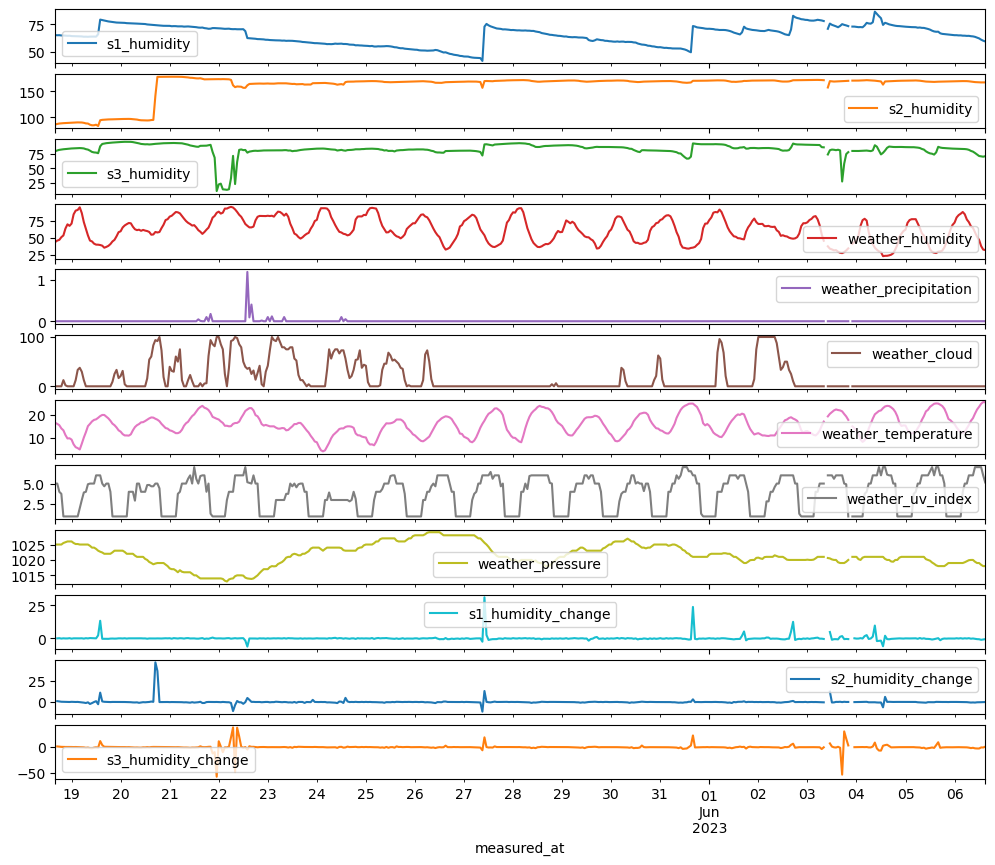

In [131]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


In [132]:
# Print df where humidity_change is is greater than 0.1 AND weather_precipitation is less than 0.1
df[(df['s1_humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0)]


,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
17,2023-05-19 09:00:00,63.695833,85.851667,80.178333,45.750000,0.0,0.000000,16.083333,5.000000,1024.583333,0.147500,-2.212500,-1.837500
21,2023-05-19 13:00:00,65.870833,83.318333,75.802500,39.750000,0.0,0.000000,18.750000,6.000000,1023.000000,2.199167,-2.520000,-1.075000
22,2023-05-19 14:00:00,79.166667,94.420000,87.653333,39.250000,0.0,0.000000,19.500000,6.000000,1022.666667,13.295833,11.101667,11.850833
58,2023-05-21 02:00:00,73.251818,178.388182,93.393636,84.727273,0.0,29.545455,12.545455,1.000000,1017.000000,0.105152,0.027348,0.086970
65,2023-05-21 09:00:00,72.958333,177.040000,90.480000,71.666667,0.0,12.500000,17.000000,5.583333,1016.000000,0.126515,-0.515455,-0.873636
72,2023-05-21 16:00:00,71.950833,174.350833,88.619167,55.500000,0.0,0.000000,24.000000,6.000000,1014.000000,0.124167,-1.094167,0.106667
77,2023-05-21 21:00:00,71.460000,173.530000,77.861667,79.250000,0.0,85.416667,19.166667,1.000000,1014.000000,0.526667,-0.031667,-12.357500
136,2023-05-24 08:00:00,57.014167,164.936667,81.994167,74.416667,0.0,68.750000,11.166667,3.000000,1024.000000,0.164167,-0.415000,-0.317500
137,2023-05-24 09:00:00,57.349167,164.219167,81.801667,68.333333,0.0,75.000000,12.000000,3.000000,1024.000000,0.335000,-0.717500,-0.192500
139,2023-05-24 11:00:00,57.275000,163.705833,80.895833,58.500000,0.0,66.666667,13.833333,3.000000,1024.000000,0.118333,0.675833,0.457500


In [133]:
# Set humidity_change to 0 where humidity_change is greater than 0.1 AND weather_precipitation is less than 0.1
for sensor in sensors:
    df.loc[(df[f'{sensor}_humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].median()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

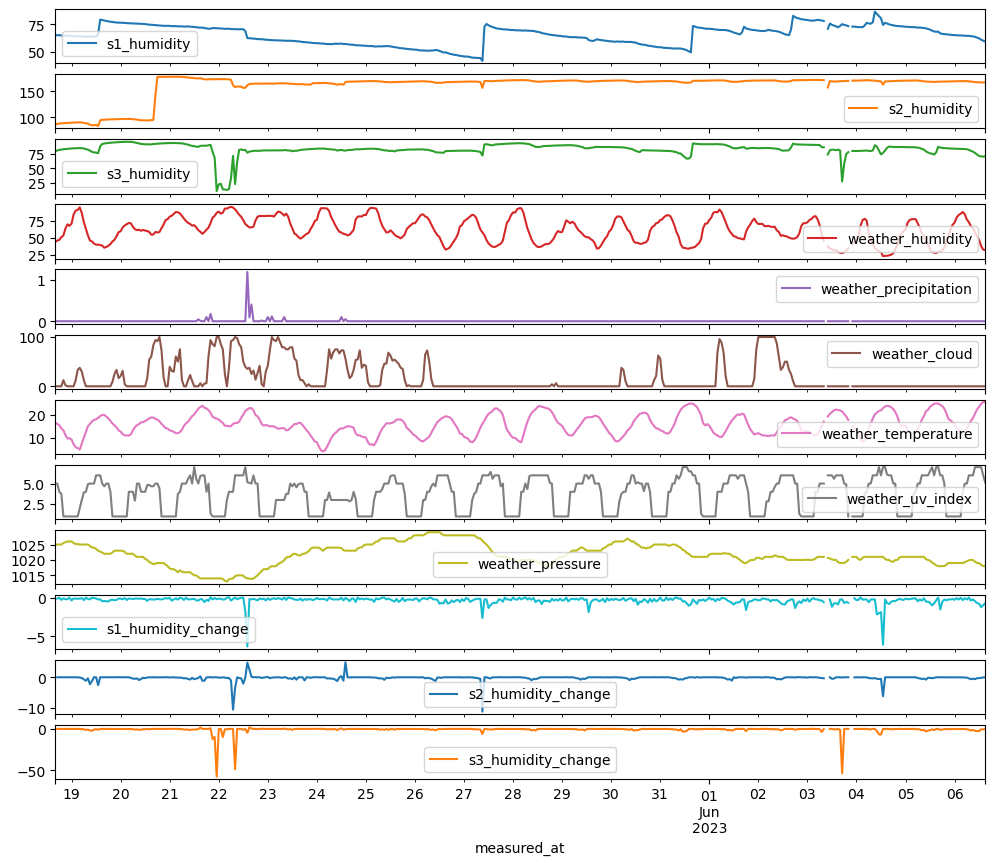

In [134]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


In [135]:
df.describe()

,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,451.000000,451.000000,451.000000
mean,64.987642,161.114936,82.831116,61.725696,0.005478,17.385136,15.746105,3.671418,1021.667352,-0.299039,-0.151141,-0.780705
std,8.827664,24.243215,11.204009,17.867024,0.060246,30.037409,4.610692,2.080175,3.598616,0.509408,0.918712,4.462084
min,41.601000,83.318333,10.570833,23.000000,0.000000,0.000000,4.000000,1.000000,1013.000000,-6.328333,-11.205500,-57.598333
25%,58.377898,166.917917,80.358125,48.000000,0.000000,0.000000,12.250000,1.000000,1019.770833,-0.353333,-0.186212,-0.404167
50%,65.455833,169.437121,83.552992,62.166667,0.000000,0.000000,15.500000,4.000000,1021.000000,-0.178333,0.047500,-0.029167
75%,72.162083,170.855000,88.823958,75.937500,0.000000,25.000000,19.000000,5.479167,1024.000000,-0.088333,0.047500,-0.029167
max,86.396364,178.388182,95.462500,95.000000,1.183333,100.000000,25.666667,7.000000,1029.000000,0.100833,4.939167,1.791667


In [136]:
thresh = 4
df[(df["s1_humidity_change"] < -thresh) | (df["s1_humidity_change"] > thresh)]



,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
94,2023-05-22 14:00:00,62.370833,161.789167,76.756667,67.333333,1.183333,35.416667,22.416667,5.166667,1014.0,-6.328333,4.838333,-4.612500
405,2023-06-04 13:00:00,74.348333,163.153333,76.465000,23.000000,0.000000,0.000000,23.000000,7.000000,1021.0,-6.098333,-6.140000,-0.029167


In [137]:
# Set humidity_change to the mean where is in the range of the threshold
for sensor in sensors:
    df.loc[(df[f'{sensor}_humidity_change'] < -thresh) | (df[f'{sensor}_humidity_change'] > thresh), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].mean()

In [138]:
df.describe()

,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,451.000000,451.000000,451.000000
mean,64.987642,161.114936,82.831116,61.725696,0.005478,17.385136,15.746105,3.671418,1021.667352,-0.272811,-0.112660,-0.320161
std,8.827664,24.243215,11.204009,17.867024,0.060246,30.037409,4.610692,2.080175,3.598616,0.321382,0.372064,0.604628
min,41.601000,83.318333,10.570833,23.000000,0.000000,0.000000,4.000000,1.000000,1013.000000,-2.613167,-3.498333,-3.640000
25%,58.377898,166.917917,80.358125,48.000000,0.000000,0.000000,12.250000,1.000000,1019.770833,-0.342500,-0.179167,-0.404167
50%,65.455833,169.437121,83.552992,62.166667,0.000000,0.000000,15.500000,4.000000,1021.000000,-0.178333,0.047500,-0.029167
75%,72.162083,170.855000,88.823958,75.937500,0.000000,25.000000,19.000000,5.479167,1024.000000,-0.088333,0.047500,-0.029167
max,86.396364,178.388182,95.462500,95.000000,1.183333,100.000000,25.666667,7.000000,1029.000000,0.100833,2.630000,1.791667


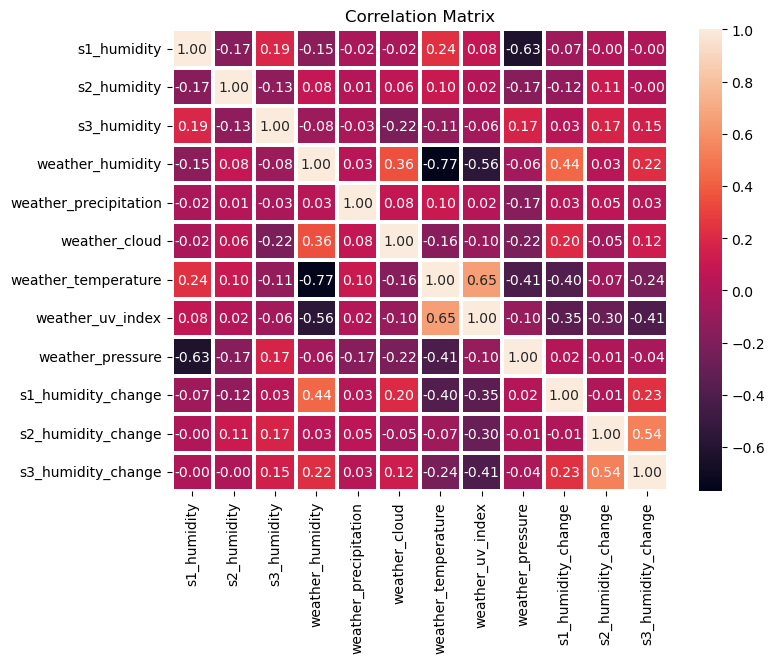

In [139]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [140]:
for sensor in sensors:
    # # Get the mean and standard deviation of the humidity_change column
    mean, std = df[f'{sensor}_humidity_change'].mean(
    ), df[f'{sensor}_humidity_change'].std()

    thresh = 4 * std

    # # Show the outlier values
    print(df[(df[f'{sensor}_humidity_change'] < mean - thresh)
        | (df[f'{sensor}_humidity_change'] > mean + thresh)])

    # Remove the outlier values 
    df.loc[(df[f'{sensor}_humidity_change'] < mean - thresh) |
           (df[f'{sensor}_humidity_change'] > mean + thresh), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].mean()




            measured_at  s1_humidity  s2_humidity  s3_humidity  \
93  2023-05-22 13:00:00    68.699167   156.950833    81.369167   
209 2023-05-27 09:00:00    41.601000   156.952000    71.813000   
261 2023-05-29 13:00:00    60.590833   168.847500    84.542500   
338 2023-06-01 18:00:00    71.140000   170.230000    83.655833   
402 2023-06-04 10:00:00    84.265000   170.292500    87.006667   
403 2023-06-04 11:00:00    82.275833   169.759167    80.452500   
404 2023-06-04 12:00:00    80.446667   169.293333    73.716667   

     weather_humidity  weather_precipitation  weather_cloud  \
93          70.000000                    0.0      39.583333   
209         57.800000                    0.0       0.000000   
261         50.500000                    0.0       0.000000   
338         58.750000                    0.0       0.000000   
402         32.333333                    0.0       0.000000   
403         30.000000                    0.0       0.000000   
404         29.000000         

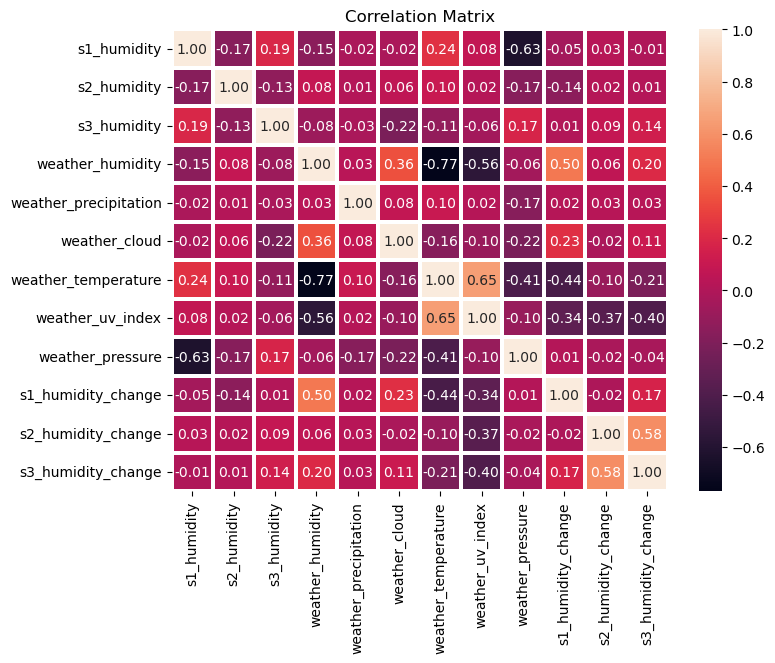

In [141]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [142]:
for sensor in sensors:
    # Shift humidity_change by 1 to the right
    df[f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].shift(1)
    # Set the NA values to the mean
    # df.loc[df[f'{sensor}_humidity_change'].isna(), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].mean()

In [143]:
df = df.fillna(df.mean())
df.isna().sum()


C:\Users\nikla\AppData\Local\Temp\ipykernel_25140\197430006.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


measured_at              0
s1_humidity              0
s2_humidity              0
s3_humidity              0
weather_humidity         0
weather_precipitation    0
weather_cloud            0
weather_temperature      0
weather_uv_index         0
weather_pressure         0
s1_humidity_change       0
s2_humidity_change       0
s3_humidity_change       0
dtype: int64

In [144]:
df.drop(columns=["s1_humidity", "s2_humidity", "s3_humidity"], inplace=True)

In [145]:
df['humidity_change'] = df[['s1_humidity_change', 's3_humidity_change']].mean(axis=1)


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

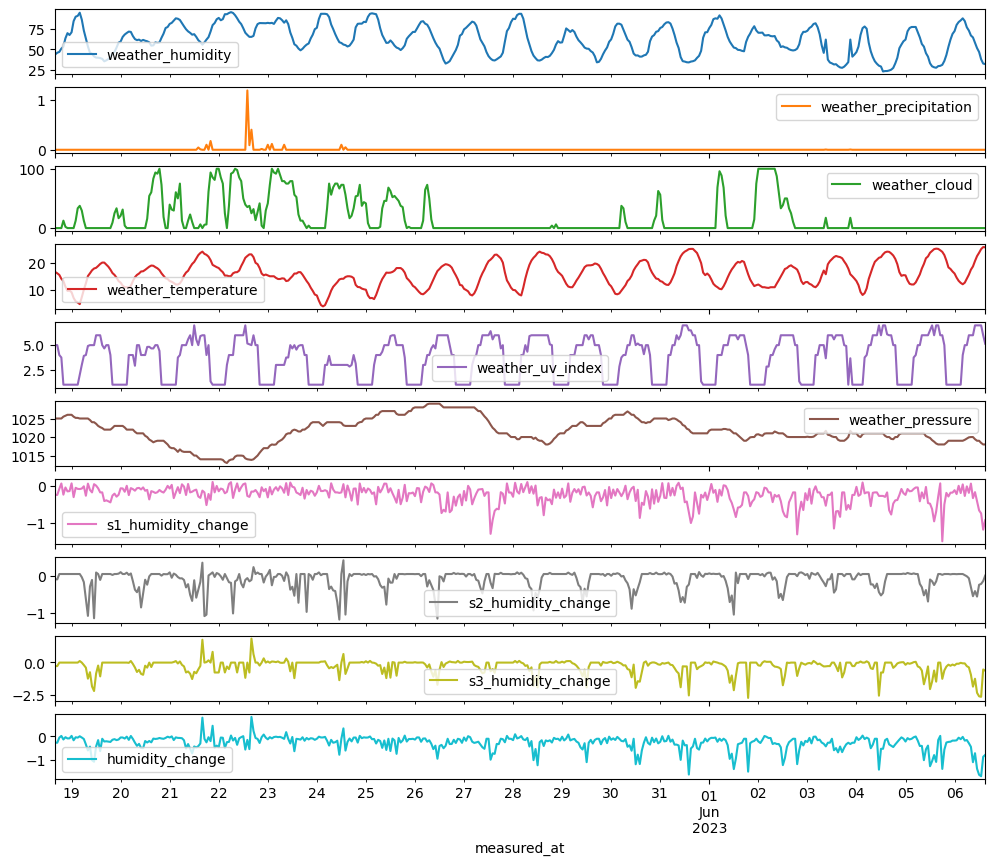

In [146]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


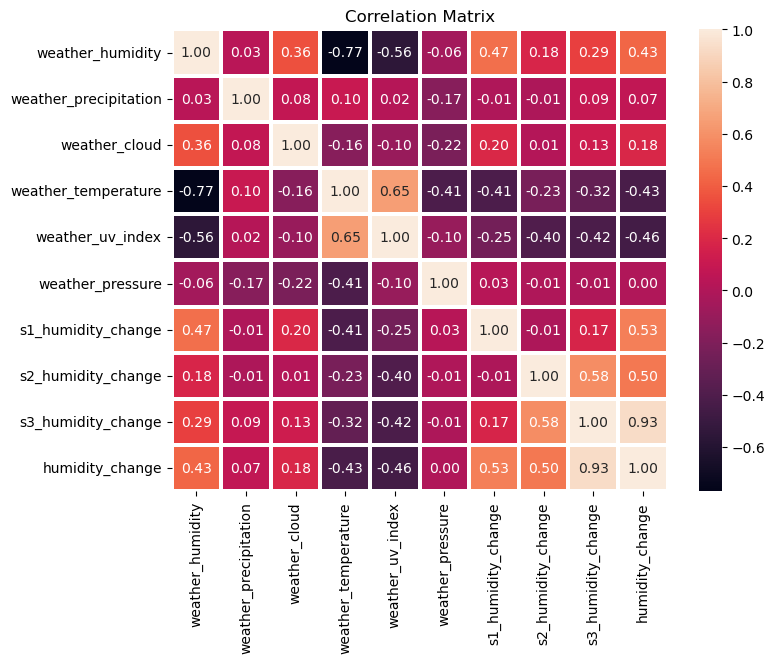

In [147]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [148]:
# Scale humidity change to % / hour
df['humidity_change'] = df['humidity_change'] / hoursPerMeasurement
df['s1_humidity_change'] = df['s1_humidity_change'] / hoursPerMeasurement
df['s2_humidity_change'] = df['s2_humidity_change'] / hoursPerMeasurement
df['s3_humidity_change'] = df['s3_humidity_change'] / hoursPerMeasurement


# Machine learning part

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Assuming your DataFrame is named 'df'
# Extract input features (X) and target variable (y)
X = df[['weather_precipitation', 'weather_temperature', 'weather_humidity', 'weather_uv_index']]
# X = df[['weather_temperature', 'weather_humidity', 'weather_uv_index']]
y = df['humidity_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform any necessary preprocessing steps
# For example, handle missing values or scale numeric features using sklearn's preprocessing functions

# Choose a machine learning algorithm (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.08403541631372649
Root Mean Squared Error: 0.289888627430823


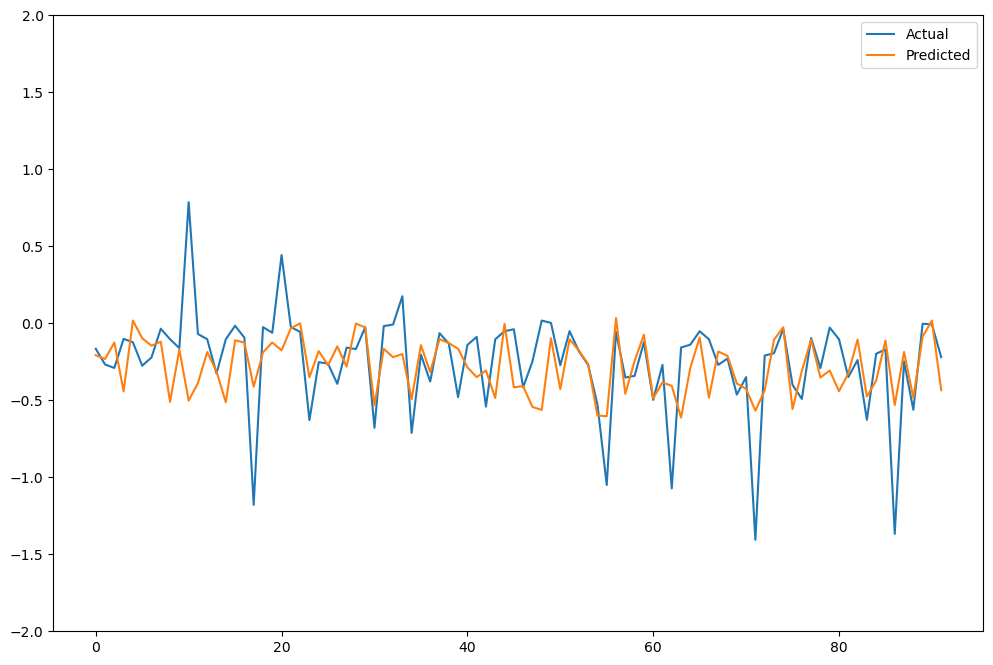

In [150]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylim(-2, 2)
plt.legend()
plt.show()

In [157]:

rand_idx = np.random.randint(0, len(y_pred))

print("Actual: \n", X_test.iloc[rand_idx])
print("\n\nActual: {:.4f} (Hum% / hour)".format(y_test.values[rand_idx]))
print("\n\nPredicted: {:.4f} (Hum% / hour)".format(y_pred[rand_idx]))


Actual: 
 weather_precipitation     0.000000
weather_temperature      14.166667
weather_humidity         71.166667
weather_uv_index          1.000000
Name: 294, dtype: float64


Actual: -0.0933 (Hum% / hour)


Predicted: -0.1252 (Hum% / hour)
